In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1.Load the dataset and display the first few rows. How many countries does the dataset have?

In [2]:
path="/content/gapminder_full.csv"
df = pd.read_csv(path)
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [3]:
print('Total number of countries :',df['country'].nunique())

Total number of countries : 142


The dataset has 142 unique countries.

2.Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [4]:
df.pivot_table(index='continent',columns='year',values='life_exp',aggfunc='mean').round(2)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.14,41.27,43.32,45.33,47.45,49.58,51.59,53.34,53.63,53.60,53.33,54.81
Americas,53.28,55.96,58.40,60.41,62.39,64.39,66.23,68.09,69.57,71.15,72.42,73.61
Asia,46.31,49.32,51.56,54.66,57.32,59.61,62.62,64.85,66.54,68.02,69.23,70.73
Europe,64.41,66.70,68.54,69.74,70.78,71.94,72.81,73.64,74.44,75.51,76.70,77.65
Oceania,69.26,70.30,71.09,71.31,71.91,72.85,74.29,75.32,76.94,78.19,79.74,80.72


**Insight:** Overall, life expectancy has improved across all continents from 1952 to 2007, reflecting global advancements in healthcare, economic development, and living conditions. However, disparities still exist, with continents like Africa lagging behind others, highlighting the need for continued efforts to address healthcare and socio-economic challenges.

3.Which countries had a GDP per capita higher than the 75th percentile in 2007?


In [5]:
df[df['year']==2007]['gdp_cap'].quantile(0.75).round(2)

18008.84

75th percentile of gdp_cap in 2007 is 18008.84

In [6]:
# df[(df['year']==2007)&(df['gdp_cap']>df[df['year']==2007]['gdp_cap'].quantile(0.75).round(2))][['country','year','gdp_cap']].round({'gdp_cap':2}).reset_index(drop=True)
df[(df['year']==2007)&(df['gdp_cap']>df[df['year']==2007]['gdp_cap'].quantile(0.75).round(2))]['country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom',
       'United States'], dtype=object)

4.Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [7]:
df[ 'Life_Exp_Range']=pd.cut(df['life_exp'],bins=4,labels=['Low','Medium','High','Very High'])
df

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,High
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,High
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,Medium
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,Medium


**Insight:** By categorizing life expectancy into bins, we can quickly assess which countries fall into different life expectancy ranges, making it easier to identify trends and outliers. For example, a significant number of countries might fall into the 'Medium' category, indicating average life expectancy globally.

In [8]:
df.groupby('Life_Exp_Range').count()['country']

,country
Life_Exp_Range,
Low,81
Medium,520
High,495
Very High,608


5.Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

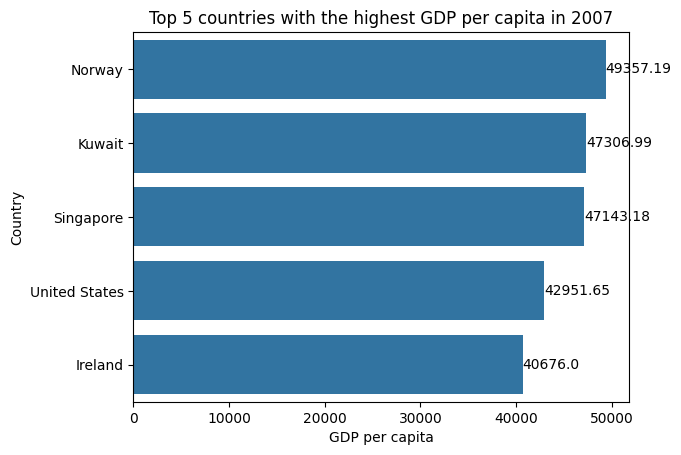

In [9]:
o5=df[df['year']==2007].sort_values('gdp_cap',ascending=False).head(5).reset_index(drop=True)[['country','gdp_cap']].round({'gdp_cap':2})
sns.barplot(x='gdp_cap',y='country',data=o5)
plt.title('Top 5 countries with the highest GDP per capita in 2007')
plt.xlabel('GDP per capita')
plt.ylabel('Country')
for index, value in enumerate(o5['gdp_cap']):
    plt.text(value, index, f'{value}', va='center')
plt.show()

#alternate approach
# o5=df[df['year']==2007].nlargest(5,'gdp_cap')[['country','gdp_cap']].round({'gdp_cap':2})
# plt.barh(o5['country'],o5['gdp_cap'])
# plt.title('Top 5 countries with the highest GDP per capita in 2007')
# plt.xlabel('GDP per capita')
# plt.ylabel('Country')
# plt.show()

In [10]:
o5

,country,gdp_cap
0,Norway,49357.19
1,Kuwait,47306.99
2,Singapore,47143.18
3,United States,42951.65
4,Ireland,40676.00


6.Find all country names that start with "I" and end with "a" using regex.


In [21]:
# df[(df['country'].str.startswith('I'))&(df['country'].str.endswith('a'))]['country'].unique()
import re
df[df['country'].str.contains('^I.*a$')]['country'].unique()

array(['India', 'Indonesia'], dtype=object)

7.Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

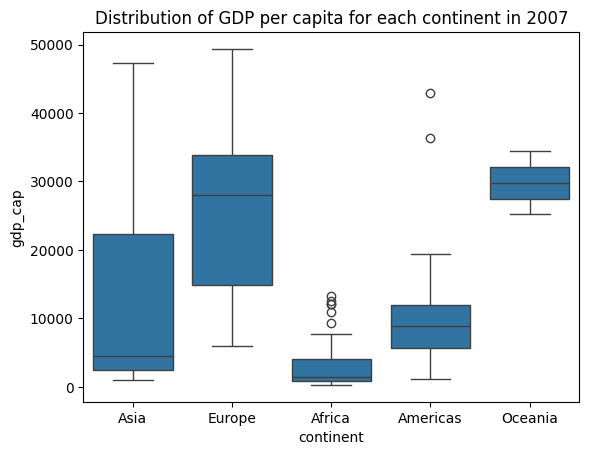

In [12]:
# df[df['year']==2007]
sns.boxplot(x='continent',y='gdp_cap',data=df[df['year']==2007])
plt.title("Distribution of GDP per capita for each continent in 2007")
plt.show()

**Insights:**

•	Africa shows several high outliers, possibly countries with unique economic advantages.

•	The Americas have a few high outliers, likely representing wealthier nations.

•	Europe and Oceania show no significant outliers, suggesting more uniformity in GDP per capita within these regions.

•	The boxplot illustrates the significant economic disparities across continents. Europe and Oceania are at the higher end of the spectrum, reflecting stronger and more consistent economic performance. In contrast, Africa shows the lowest GDP per capita with a narrow distribution, highlighting the continent's economic challenges. Asia and the Americas show more variability, indicating a mix of wealthier and less wealthy nations within these regions.


8.Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [13]:
df[(df['life_exp'] > 80)& (df['year']==2007)].sort_values(by='life_exp')[['continent','country','life_exp','year']].reset_index(drop=True)

,continent,country,life_exp,year
0,Europe,Norway,80.196,2007
1,Oceania,New Zealand,80.204,2007
2,Europe,Italy,80.546,2007
3,Americas,Canada,80.653,2007
4,Europe,France,80.657,2007
5,Asia,Israel,80.745,2007
6,Europe,Sweden,80.884,2007
7,Europe,Spain,80.941,2007
8,Oceania,Australia,81.235,2007
9,Europe,Switzerland,81.701,2007


**Insight:** Countries with life expectancy over 80 years are typically developed nations with advanced healthcare systems, low infant mortality rates, and high standards of living. These factors contribute to longer life spans.

9.Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [14]:
df['year']=pd.to_datetime(df['year'],format='%Y')
df['year'] = df['year'].dt.year
df['Decade']=(df['year']//10)*10
df[['year','Decade']].head()

,year,Decade
0,1952,1950
1,1957,1950
2,1962,1960
3,1967,1960
4,1972,1970


**Insight:** Grouping years into decades allows us to analyze trends over longer periods, smoothing out short-term fluctuations and focusing on significant long-term patterns.

10.Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

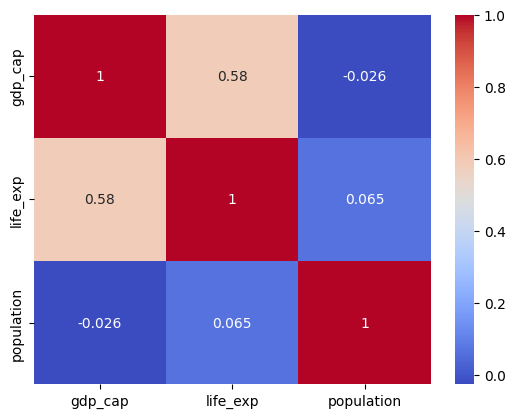

In [15]:
df[['gdp_cap','life_exp','population']].corr()
sns.heatmap(annot=True,cmap='coolwarm',data=df[['gdp_cap','life_exp','population']].corr())
plt.show()

**Insight: **The heatmap reveals the relationships between GDP per capita, life expectancy, and population. A strong positive correlation between GDP per capita and life expectancy might indicate that wealthier countries tend to have better healthcare and living conditions, leading to longer life expectancy.

11.How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.
Subjective Question: Discuss the various reasons that could have contributed to the change.


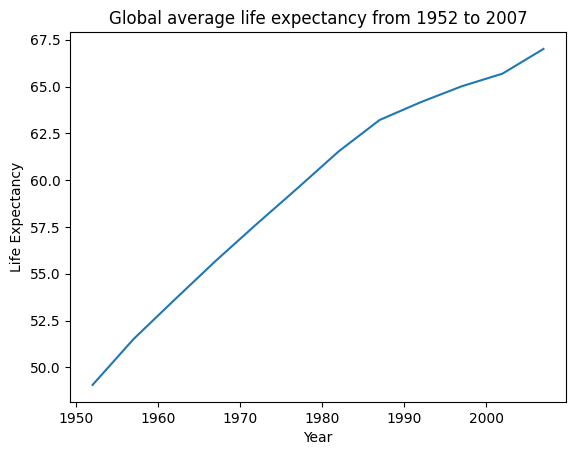

In [16]:
o11=df[(df['year']>=1952)&(df['year']<=2007)].groupby('year')['life_exp'].mean().round(2)
plt.plot(o11)
plt.title('Global average life expectancy from 1952 to 2007')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

**Discussion: **The global average life expectancy has shown a steady increase from 1952 to 2007. Several factors likely contributed to this trend, including advancements in medical technology, improved access to healthcare, better sanitation and nutrition, and overall economic development. Efforts to combat infectious diseases, reduce child mortality, and promote healthier lifestyles have also played a significant role. However, the rate of improvement may vary across regions, reflecting disparities in development and healthcare infrastructure.

12.For the year 2007, analyze the relationship between life expectancy and GDP per capita.
Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.

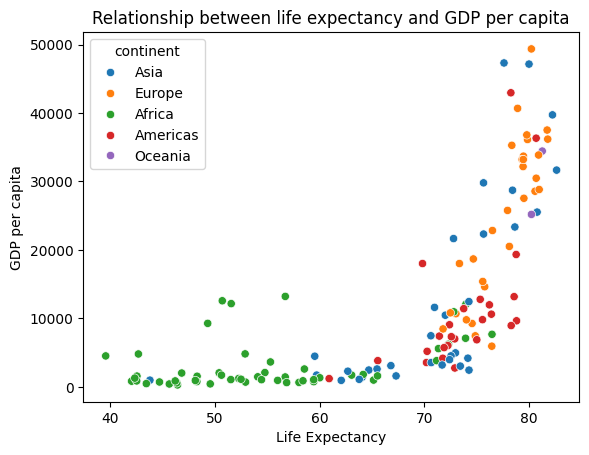

In [17]:
# df[df['year']==2007].plot.scatter(x='gdp_cap',y='life_exp')
sns.scatterplot(x='life_exp',y='gdp_cap',data=df[df['year']==2007],hue='continent')
plt.title('Relationship between life expectancy and GDP per capita')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per capita')
plt.show()

**Discussion: **A scatter plot of life expectancy versus GDP per capita for the year 2007 typically shows a positive correlation, indicating that countries with higher GDP per capita tend to have longer life expectancies. This trend can be attributed to the fact that wealthier countries can afford better healthcare systems, higher standards of living, and more robust social safety nets. However, there may be exceptions where countries with moderate GDP per capita achieve high life expectancy due to efficient healthcare systems or social policies.

13.Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?


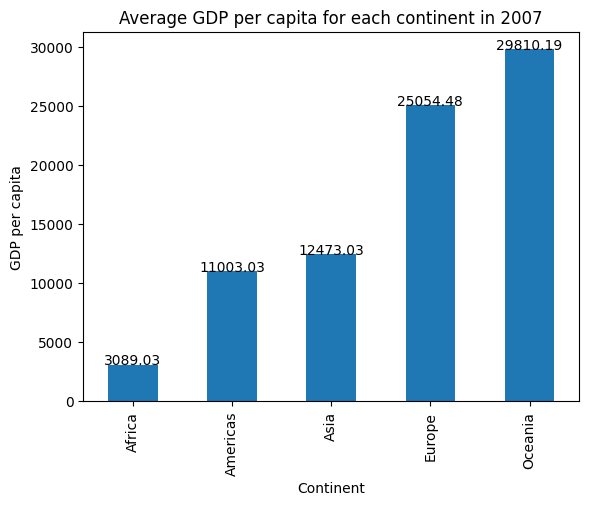

In [18]:
# df[df['year']==2007].groupby('continent').mean()['gdp_cap'].round(2)
df[df['year'] == 2007].groupby('continent')['gdp_cap'].mean().round(2).plot.bar()
plt.title('Average GDP per capita for each continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP per capita')
for index, value in enumerate(df[df['year'] == 2007].groupby('continent')['gdp_cap'].mean().round(2)):
    plt.text(index, value, f'{value}', ha='center')
plt.show()

**Discussion:** Oceania's higher average GDP per capita compared to the Americas, despite having fewer countries, can be attributed to the economic performance of Australia and New Zealand, which dominate the region. These countries have strong, stable economies with significant natural resources, advanced industries, and well-developed infrastructure. In contrast, the Americas include a mix of high-income countries like the United States and Canada and lower-income countries in Central and South America, which lowers the overall average GDP per capita for the continent.

14.Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.

-Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.

-Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.

Subjective Question: What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.



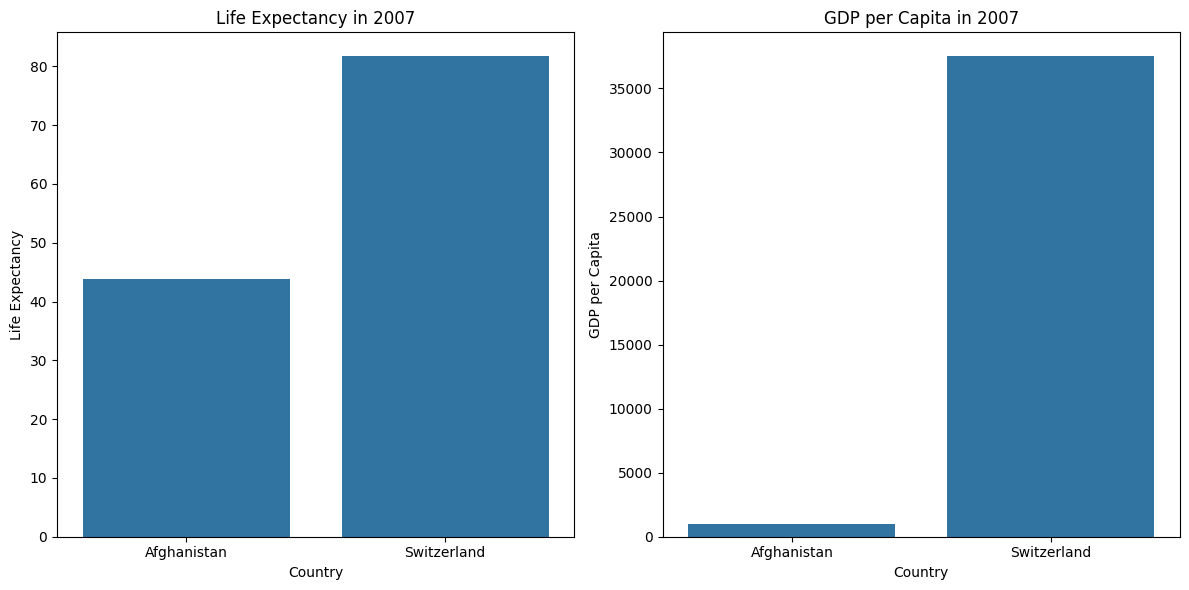

In [19]:
fig,ax1= plt.subplots(1,2,figsize=(12, 6))
sns.barplot(x='country',y='life_exp',data=df[((df['country']=='Afghanistan')|(df['country']=='Switzerland'))&(df['year']==2007)].groupby('country')[['life_exp','gdp_cap']].mean().round(2),ax=ax1[0])
ax1[0].set_title('Life Expectancy in 2007')
ax1[0].set_ylabel('Life Expectancy')
ax1[0].set_xlabel('Country')

sns.barplot(x='country',y='gdp_cap',data=df[((df['country']=='Afghanistan')|(df['country']=='Switzerland'))&(df['year']==2007)].groupby('country')[['life_exp','gdp_cap']].mean().round(2),ax=ax1[1])
ax1[1].set_title('GDP per Capita in 2007')
ax1[1].set_ylabel('GDP per Capita')
ax1[1].set_xlabel('Country')
plt.tight_layout()
plt.show()

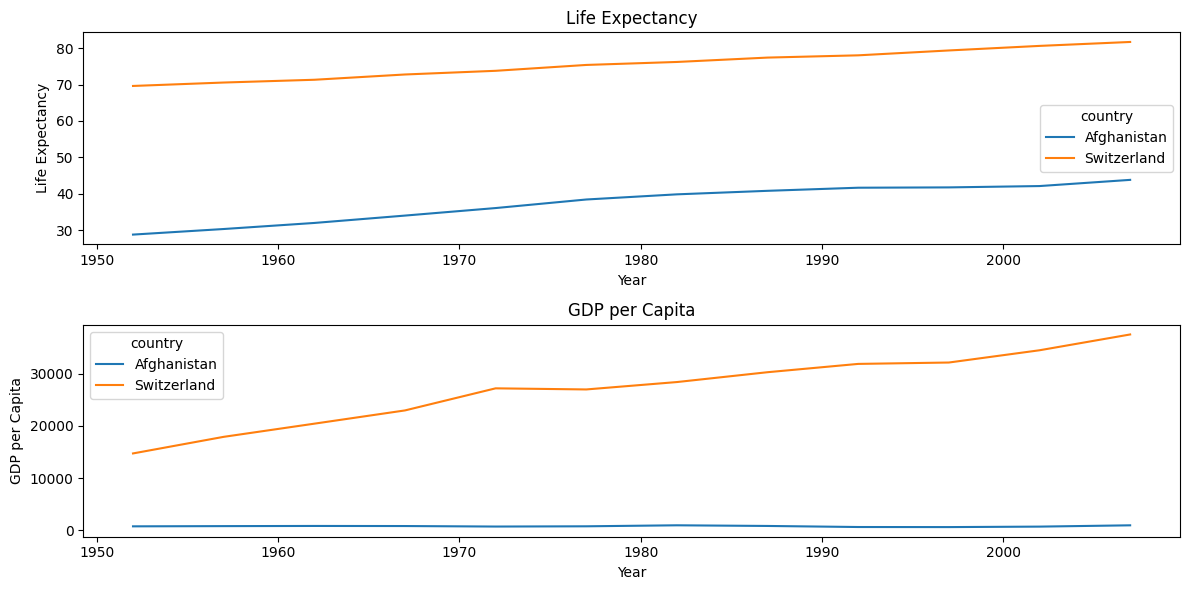

In [20]:
fig,ax=plt.subplots(2,1,figsize=(12,6))
sns.lineplot(x='year', y='life_exp', hue='country',
             data=df[(df['country'] == 'Afghanistan') | (df['country'] == 'Switzerland')],
             ax=ax[0])
ax[0].set_title('Life Expectancy')
ax[0].set_ylabel('Life Expectancy')
ax[0].set_xlabel('Year')
sns.lineplot(x='year', y='gdp_cap', hue='country',
             data=df[(df['country'] == 'Afghanistan') | (df['country'] == 'Switzerland')],
             ax=ax[1])
ax[1].set_title('GDP per Capita')
ax[1].set_ylabel('GDP per Capita')
ax[1].set_xlabel('Year')
plt.tight_layout()
plt.show()

**Discussion:** Afghanistan and Switzerland present stark contrasts in both life expectancy and GDP per capita. Afghanistan, with its history of conflict, instability, and economic challenges, shows significantly lower values in both metrics. In contrast, Switzerland, known for its peace, stability, and economic prosperity, exhibits high life expectancy and GDP per capita. The data highlights how a nation's stability directly impacts its economic development and the health and well-being of its population. Continuous conflict disrupts economic growth, healthcare systems, and social structures, leading to poorer outcomes in these key metrics over time.

**Conclusion and Integrated Insights**
The comprehensive exploratory data analysis of the Gapminder dataset provides a deep understanding of global demographic, economic, and health trends from 1952 to 2007. This analysis reveals several key insights:

**Global Life Expectancy Trends:** Over the years, life expectancy has generally improved across all continents, driven by advancements in healthcare, better nutrition, and increased access to clean water and sanitation. However, the data also highlights significant disparities between continents, with Africa consistently lagging behind due to persistent challenges such as poverty, disease, and political instability.

**Economic Disparities Across Continents:** The analysis of GDP per capita shows stark differences in economic development between regions. Continents like Europe and Oceania exhibit higher and more uniform GDP per capita, while Africa and Asia display greater variability, reflecting the diverse economic landscapes within these regions. This disparity is particularly evident when comparing countries like Switzerland and Afghanistan, where the former's economic stability and growth have led to high GDP per capita and life expectancy, while the latter's ongoing conflicts have severely hindered its development.

**Correlation Between Wealth and Health:** The correlation matrix analysis reveals a strong positive relationship between GDP per capita and life expectancy, suggesting that wealthier countries tend to have better healthcare systems, higher standards of living, and, consequently, longer life expectancies. This correlation is crucial for policymakers, indicating that economic growth and investments in healthcare can lead to significant improvements in population health.

**Regional Differences in Development:**The regional analysis of GDP per capita and life expectancy underscores the impact of historical, social, and political factors on development. For instance, countries in Europe and North America, which have enjoyed long periods of stability, show higher development indicators compared to regions that have experienced prolonged conflicts or economic instability.

**Impact of Conflict on Development:** The stark contrast between Afghanistan and Switzerland illustrates the profound impact of conflict on a nation's development. Afghanistan's struggles with low life expectancy and GDP per capita are direct consequences of its turbulent history, while Switzerland's peaceful and prosperous environment has enabled continuous improvement in these metrics. This comparison emphasizes the importance of stability and peace in fostering economic growth and improving quality of life.

**Long-Term Trends and Implications:** The decade-based analysis of life expectancy and GDP per capita trends highlights the importance of long-term strategies in addressing global challenges. While short-term fluctuations may occur due to various factors, sustained efforts in improving healthcare, education, and economic policies are essential for achieving lasting progress.

**Final Thoughts:**
This EDA not only provides valuable insights into historical trends but also serves as a foundation for future research and policy development. Understanding the relationships between economic development, health, and demographic changes is critical for creating effective strategies that promote global well-being and reduce disparities. The data highlights the importance of investing in healthcare, ensuring political stability, and fostering economic growth to achieve better outcomes for populations worldwide.
